In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/fulltimestamp/fulltimestamponly.csv', parse_dates=True, on_bad_lines='skip')

In [2]:
df.head()

,asin,timestamp,rank,year,month,date,day,GROUP,FORMAT,TITLE,AUTHOR,PUBLISHER,GENRE
0,B00Q1Y09GY,2018-04-06T00:00:00.000Z,180404,2018,4,6,Friday,kindle,kindle edition,The Small Fortune of Dorothea Q: An epic page-...,Sharon Maas,Bookouture,biography
1,B00Q1Y09GY,2017-10-24T00:00:00.000Z,108026,2017,10,24,Tuesday,kindle,kindle edition,The Small Fortune of Dorothea Q: An epic page-...,Sharon Maas,Bookouture,biography
2,B00Q1Y09GY,2017-06-22T00:00:00.000Z,32705,2017,6,22,Thursday,kindle,kindle edition,The Small Fortune of Dorothea Q: An epic page-...,Sharon Maas,Bookouture,biography
3,B00Q1Y09GY,2018-06-02T00:00:00.000Z,60672,2018,6,2,Saturday,kindle,kindle edition,The Small Fortune of Dorothea Q: An epic page-...,Sharon Maas,Bookouture,biography
4,B00Q1Y09GY,2017-07-29T00:00:00.000Z,50281,2017,7,29,Saturday,kindle,kindle edition,The Small Fortune of Dorothea Q: An epic page-...,Sharon Maas,Bookouture,biography


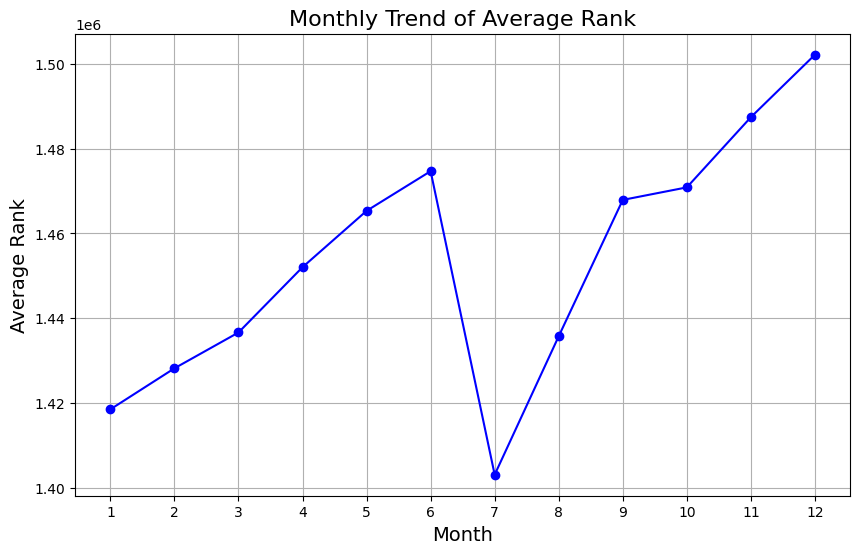

In [3]:
# Grouping by 'month' and calculating the average rank
monthly_trend = df.groupby('month')['rank'].mean().reset_index()
# Display the trend data
# print(monthly_trend)



# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['month'], monthly_trend['rank'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Monthly Trend of Average Rank', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Rank', fontsize=14)
plt.xticks(monthly_trend['month'])  # Ensure all months are shown

# Display the plot
plt.grid(True)
plt.show()



# Grouping by 'day' and calculating the average rank
daily_trend = df.groupby('day')['rank'].mean().reset_index()

# # Display the trend data
# print(daily_trend)

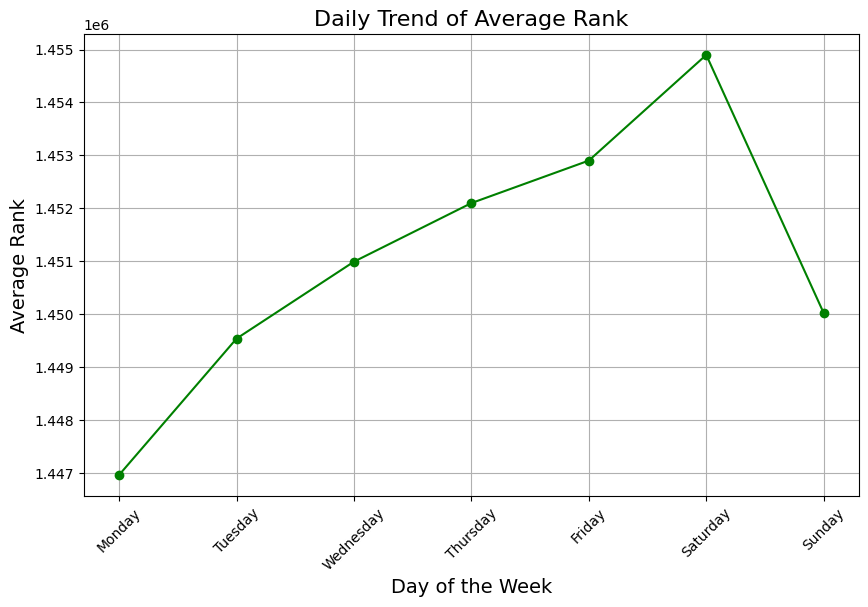

In [4]:
# Define the correct order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sorting the DataFrame based on day_order
daily_trend['day'] = pd.Categorical(daily_trend['day'], categories=day_order, ordered=True)
daily_trend = daily_trend.sort_values('day')

# Plotting the daily trend
plt.figure(figsize=(10, 6))
plt.plot(daily_trend['day'], daily_trend['rank'], marker='o', linestyle='-', color='g')

# Adding titles and labels
plt.title('Daily Trend of Average Rank', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Rank', fontsize=14)
plt.xticks(rotation=45)  # Rotate for better readability if needed

# Display the plot
plt.grid(True)
plt.show()

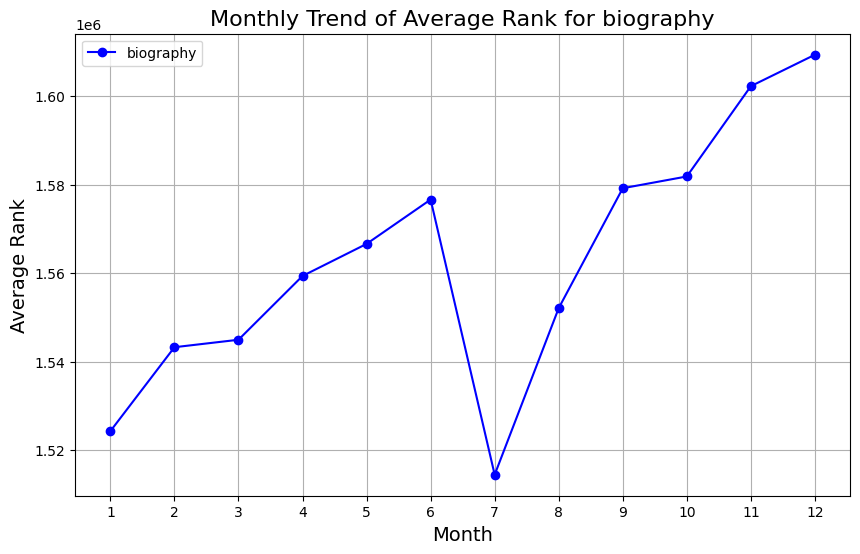

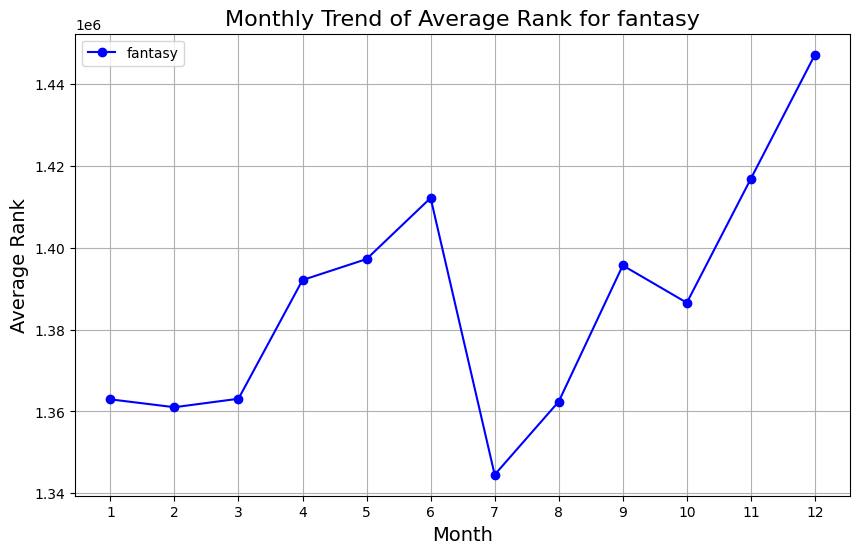

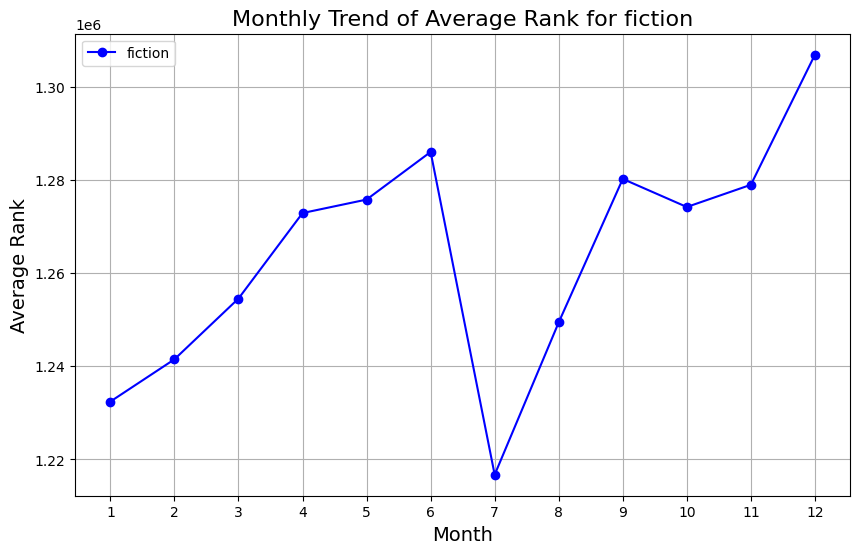

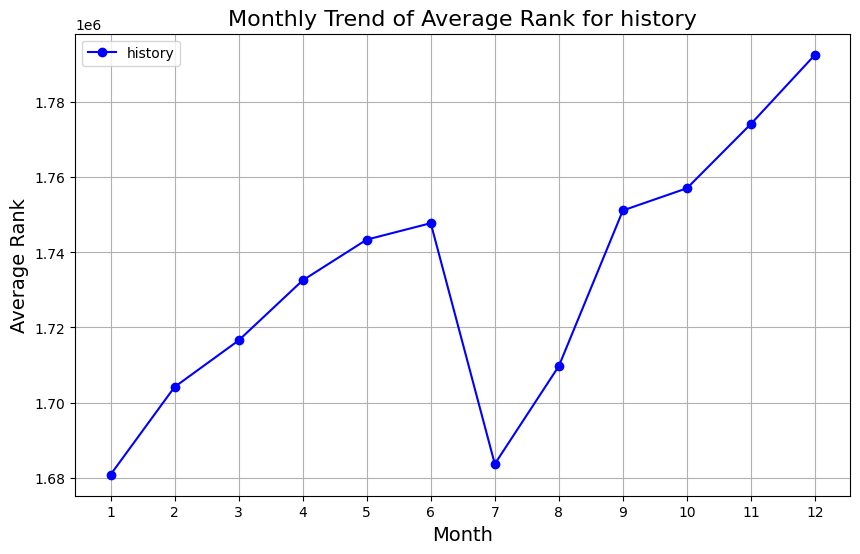

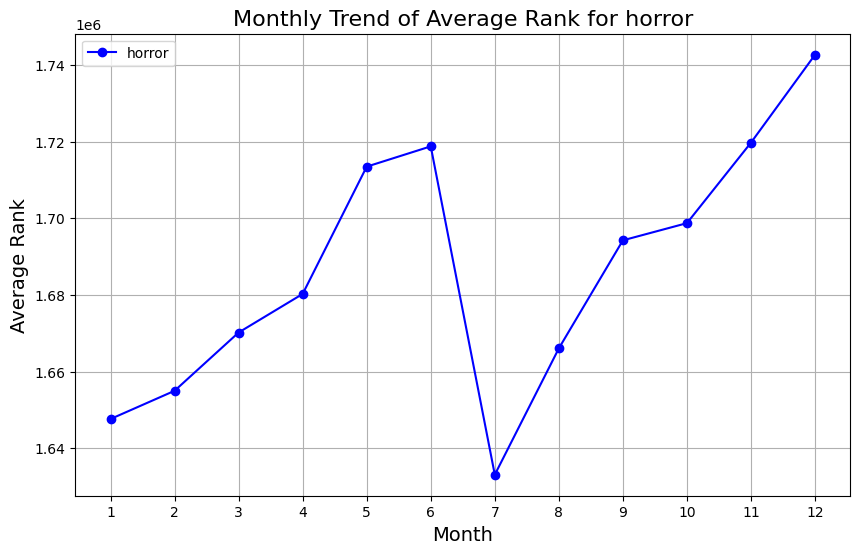

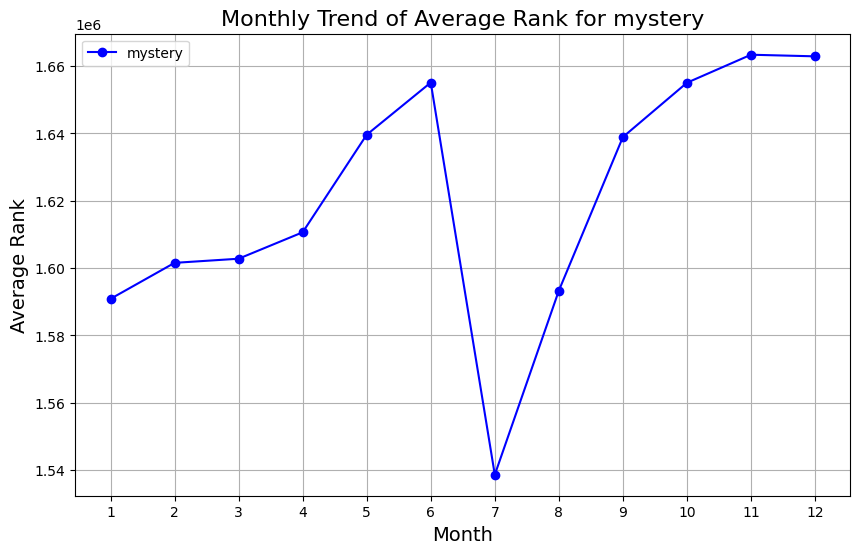

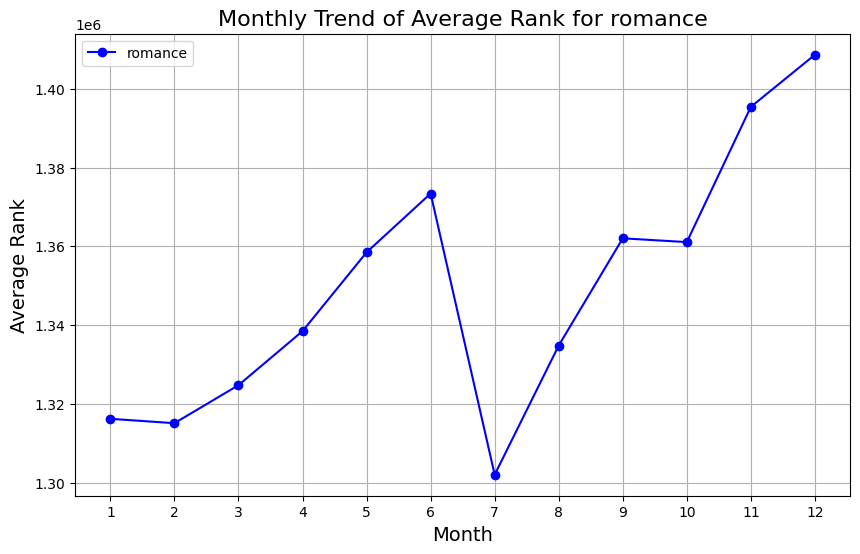

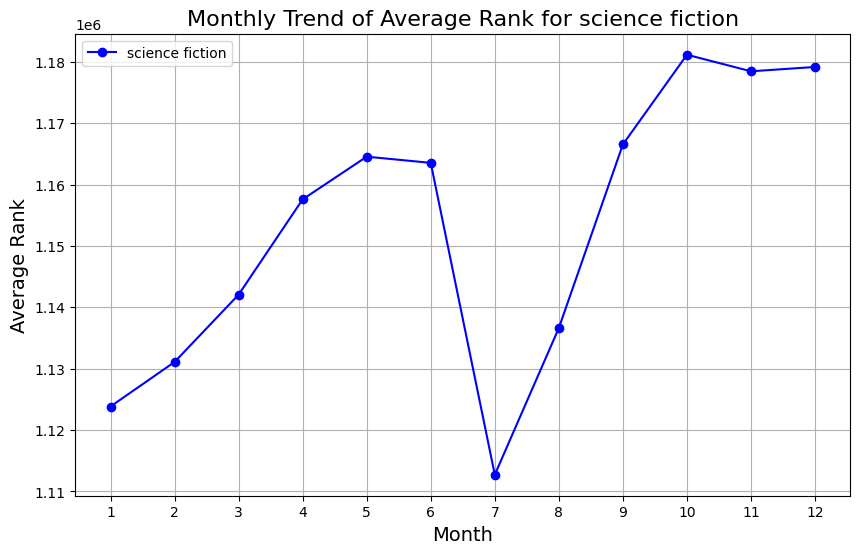

In [5]:
# Group by Genre & Month
genre_monthly_trend = df.groupby(['GENRE', 'month'])['rank'].mean().reset_index()

# Plot separate graphs for each genre
for genre in genre_monthly_trend['GENRE'].unique():
    subset = genre_monthly_trend[genre_monthly_trend['GENRE'] == genre]
    
    plt.figure(figsize=(10, 6))
    plt.plot(subset['month'], subset['rank'], marker='o', linestyle='-', label=genre, color='b')
    
    # Titles & Labels
    plt.title(f'Monthly Trend of Average Rank for {genre}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Rank', fontsize=14)
    plt.xticks(range(1, 13))  # Ensure all months are shown
    plt.legend()
    plt.grid(True)
    
    # Show each genre plot separately
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


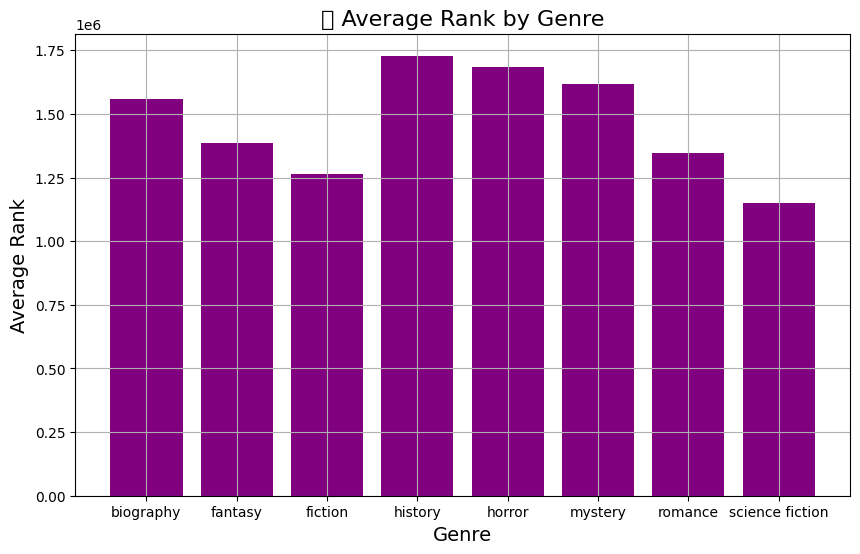

In [6]:
# Group by Genre
genre_trend = df.groupby('GENRE')['rank'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(genre_trend['GENRE'], genre_trend['rank'], color='purple')
plt.title('📚 Average Rank by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rank', fontsize=14)
plt.grid(True)
plt.show()